In [24]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC 

In [25]:
df = pd.read_csv(".venv/ObesityDataSet.csv")
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [26]:
df.dtypes

Gender                             object
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
NObeyesdad                         object
dtype: object

In [27]:
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [28]:
df.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

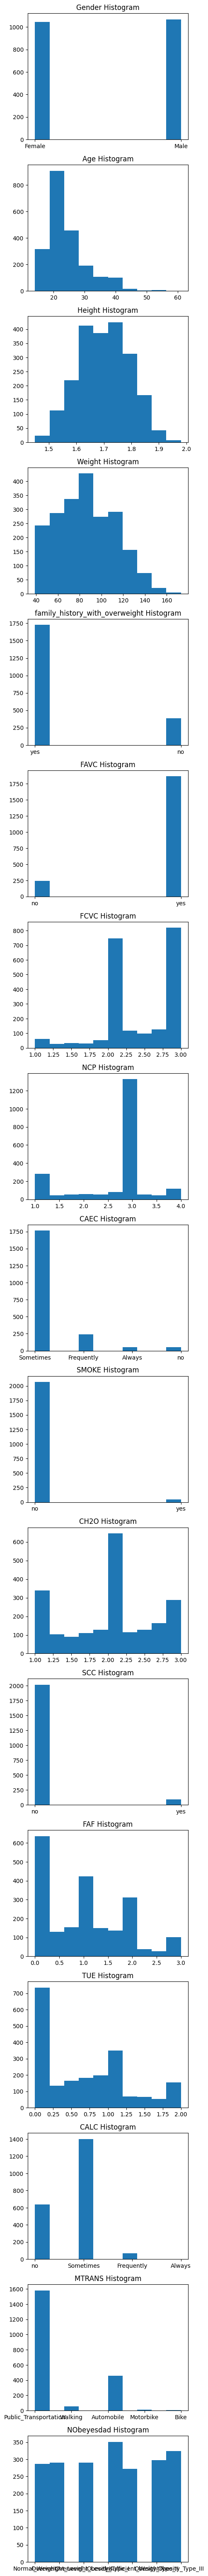

In [29]:
import matplotlib.pyplot as plt

columns = df.columns

fig, axs = plt.subplots(len(columns), figsize=(5, 80))

for i, column in enumerate(columns):
    axs[i].hist(df[column])  
    axs[i].set_title(f'{column} Histogram') 

plt.show()

In [30]:
obesity_label = df["NObeyesdad"]
obesity_features = df.drop(["NObeyesdad","FAVC","SCC","SMOKE"], axis = 1)
obesity_features

,Gender,Age,Height,Weight,family_history_with_overweight,FCVC,NCP,CAEC,CH2O,FAF,TUE,CALC,MTRANS
0,Female,21.000000,1.620000,64.000000,yes,2.0,3.0,Sometimes,2.000000,0.000000,1.000000,no,Public_Transportation
1,Female,21.000000,1.520000,56.000000,yes,3.0,3.0,Sometimes,3.000000,3.000000,0.000000,Sometimes,Public_Transportation
2,Male,23.000000,1.800000,77.000000,yes,2.0,3.0,Sometimes,2.000000,2.000000,1.000000,Frequently,Public_Transportation
3,Male,27.000000,1.800000,87.000000,no,3.0,3.0,Sometimes,2.000000,2.000000,0.000000,Frequently,Walking
4,Male,22.000000,1.780000,89.800000,no,2.0,1.0,Sometimes,2.000000,0.000000,0.000000,Sometimes,Public_Transportation
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,3.0,3.0,Sometimes,1.728139,1.676269,0.906247,Sometimes,Public_Transportation
2107,Female,21.982942,1.748584,133.742943,yes,3.0,3.0,Sometimes,2.005130,1.341390,0.599270,Sometimes,Public_Transportation
2108,Female,22.524036,1.752206,133.689352,yes,3.0,3.0,Sometimes,2.054193,1.414209,0.646288,Sometimes,Public_Transportation
2109,Female,24.361936,1.739450,133.346641,yes,3.0,3.0,Sometimes,2.852339,1.139107,0.586035,Sometimes,Public_Transportation


In [31]:
scores_cat = obesity_features[["Gender","family_history_with_overweight","CAEC", "CALC","MTRANS"]]
cat_pipeline = Pipeline([
    ('onehot', OneHotEncoder())
])
cat_attribs = list(scores_cat)

scores_num = obesity_features[["Age","Height","Weight", "FCVC","NCP","CH2O","FAF","TUE"]]
num_pipeline = Pipeline(steps=[
    ('scaler', StandardScaler())
])
num_attribs = list(scores_num)


full_pipeline = ColumnTransformer([
    ("cat", cat_pipeline, cat_attribs),("num",num_pipeline,num_attribs)
])
features_prepared = full_pipeline.fit_transform(obesity_features)
print(features_prepared)

[[ 1.          0.          0.         ... -0.01307326 -1.18803911
   0.56199675]
 [ 1.          0.          0.         ...  1.61875854  2.33975012
  -1.08062463]
 [ 0.          1.          0.         ... -0.01307326  1.16382038
   0.56199675]
 ...
 [ 1.          0.          0.         ...  0.0753606   0.47497132
  -0.01901815]
 [ 1.          0.          0.         ...  1.37780063  0.15147069
  -0.11799101]
 [ 1.          0.          0.         ...  1.39603472  0.01899633
   0.09243207]]


In [32]:
X_train, X_test, y_train, y_test = train_test_split(features_prepared,obesity_label, test_size=0.2, random_state=42)

In [33]:
model = RandomForestClassifier(n_estimators=1000, random_state=42)  # počet stromů v lese je 100
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1000, random_state=42)

In [34]:
y_pred = model.predict(X_test)
report = classification_report(y_test, y_pred)
print(report)

                     precision    recall  f1-score   support

Insufficient_Weight       0.98      0.96      0.97        56
      Normal_Weight       0.86      0.89      0.87        62
     Obesity_Type_I       0.99      0.95      0.97        78
    Obesity_Type_II       0.97      0.98      0.97        58
   Obesity_Type_III       1.00      1.00      1.00        63
 Overweight_Level_I       0.84      0.86      0.85        56
Overweight_Level_II       0.96      0.96      0.96        50

           accuracy                           0.94       423
          macro avg       0.94      0.94      0.94       423
       weighted avg       0.94      0.94      0.94       423


In [35]:
sample_data = features_prepared[:10]
sample_labels = obesity_label[:10]

print(model.predict(sample_data))

print(list(sample_labels))

['Normal_Weight' 'Normal_Weight' 'Normal_Weight' 'Overweight_Level_I'
 'Overweight_Level_II' 'Normal_Weight' 'Normal_Weight' 'Normal_Weight'
 'Normal_Weight' 'Normal_Weight']
['Normal_Weight', 'Normal_Weight', 'Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II', 'Normal_Weight', 'Normal_Weight', 'Normal_Weight', 'Normal_Weight', 'Normal_Weight']


In [36]:
param_grid = {
    'n_estimators': [100, 200, 300],  # Počet stromů v lese
    'max_depth': [None, 10, 20],  # Maximální hloubka stromu
    'min_samples_split': [2, 5, 10],  # Minimální počet vzorků potřebných k rozdělení vrcholu
    'min_samples_leaf': [1, 2, 4]  # Minimální počet vzorků potřebných v listu
}

rf = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1)

# Ladění hyperparametrů pomocí Grid Search na trénovacích datech
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [37]:
best_rf = grid_search.best_estimator_

# Predikce na testovací sadě
y_pred = best_rf.predict(X_test)

# Přesnost modelu
report = classification_report(y_test, y_pred)
print(report)

                     precision    recall  f1-score   support

Insufficient_Weight       0.98      0.96      0.97        56
      Normal_Weight       0.86      0.90      0.88        62
     Obesity_Type_I       0.99      0.95      0.97        78
    Obesity_Type_II       0.97      0.98      0.97        58
   Obesity_Type_III       1.00      1.00      1.00        63
 Overweight_Level_I       0.86      0.88      0.87        56
Overweight_Level_II       0.98      0.96      0.97        50

           accuracy                           0.95       423
          macro avg       0.95      0.95      0.95       423
       weighted avg       0.95      0.95      0.95       423


In [38]:
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [39]:
predictions = model.predict(X_test)
print(predictions)

['Insufficient_Weight' 'Obesity_Type_III' 'Insufficient_Weight'
 'Insufficient_Weight' 'Overweight_Level_I' 'Insufficient_Weight'
 'Obesity_Type_II' 'Overweight_Level_I' 'Obesity_Type_I'
 'Insufficient_Weight' 'Obesity_Type_I' 'Obesity_Type_III'
 'Obesity_Type_II' 'Obesity_Type_II' 'Obesity_Type_III' 'Obesity_Type_I'
 'Obesity_Type_III' 'Obesity_Type_II' 'Obesity_Type_II'
 'Overweight_Level_II' 'Obesity_Type_I' 'Overweight_Level_I'
 'Obesity_Type_III' 'Obesity_Type_I' 'Normal_Weight' 'Obesity_Type_I'
 'Overweight_Level_II' 'Obesity_Type_III' 'Obesity_Type_III'
 'Insufficient_Weight' 'Obesity_Type_III' 'Overweight_Level_I'
 'Obesity_Type_I' 'Normal_Weight' 'Insufficient_Weight' 'Obesity_Type_III'
 'Obesity_Type_I' 'Normal_Weight' 'Normal_Weight' 'Normal_Weight'
 'Insufficient_Weight' 'Obesity_Type_II' 'Normal_Weight'
 'Overweight_Level_I' 'Overweight_Level_I' 'Insufficient_Weight'
 'Obesity_Type_II' 'Overweight_Level_I' 'Obesity_Type_I' 'Obesity_Type_II'
 'Normal_Weight' 'Insufficient_W

In [40]:
report = classification_report(y_test, predictions)
print(report)

                     precision    recall  f1-score   support

Insufficient_Weight       0.85      1.00      0.92        56
      Normal_Weight       0.91      0.66      0.77        62
     Obesity_Type_I       0.91      0.91      0.91        78
    Obesity_Type_II       0.90      0.97      0.93        58
   Obesity_Type_III       1.00      1.00      1.00        63
 Overweight_Level_I       0.66      0.73      0.69        56
Overweight_Level_II       0.74      0.70      0.72        50

           accuracy                           0.86       423
          macro avg       0.85      0.85      0.85       423
       weighted avg       0.86      0.86      0.86       423


In [41]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Inverzní síla regularizace
    'penalty': ['l1', 'l2'],  # Typ regularizace
    'solver': ['liblinear']  # Optimalizační algoritmus
}

# Inicializace modelu logistické regrese
model = LogisticRegression(max_iter=1000)

# Vytvoření Grid Search
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')

# Vyhledání nejlepších hyperparametrů
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2'], 'solver': ['liblinear']},
             scoring='accuracy')

In [42]:
best_rf = grid_search.best_estimator_

# Predikce na testovací sadě
y_pred_log = best_rf.predict(X_test)

# Vyhodnocení přesnosti modelu na testovací sadě
report = classification_report(y_test, y_pred_log)
print(report)

                     precision    recall  f1-score   support

Insufficient_Weight       0.97      1.00      0.98        56
      Normal_Weight       0.72      0.55      0.62        62
     Obesity_Type_I       0.67      0.74      0.71        78
    Obesity_Type_II       0.88      0.97      0.92        58
   Obesity_Type_III       1.00      1.00      1.00        63
 Overweight_Level_I       0.49      0.57      0.53        56
Overweight_Level_II       0.40      0.32      0.36        50

           accuracy                           0.74       423
          macro avg       0.73      0.74      0.73       423
       weighted avg       0.74      0.74      0.74       423


In [ ]:
model = GradientBoostingClassifier() 
param_grid = {'learning_rate': [0.01,0.02,0.03],
                  'subsample'    : [0.9, 0.5, 0.2],
                  'n_estimators' : [100,500,1000],
                  'max_depth'    : [4,6,8]
                 }

grid_search = GridSearchCV(model, param_grid,  cv=5, scoring='accuracy')

# Vyhledání nejlepších hyperparametrů
grid_search.fit(X_train, y_train)

In [ ]:
best_rf = grid_search.best_estimator_

# Predikce na testovací sadě
y_pred_log = best_rf.predict(X_test)

# Vyhodnocení přesnosti modelu na testovací sadě
report = classification_report(y_test, y_pred_log)
print(report)

In [ ]:
model = SVC() 
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}

grid_search = GridSearchCV(model, param_grid)

# Vyhledání nejlepších hyperparametrů
grid_search.fit(X_train, y_train)

In [ ]:
best_rf = grid_search.best_estimator_

# Predikce na testovací sadě
y_pred_log = best_rf.predict(X_test)

# Vyhodnocení přesnosti modelu na testovací sadě
report = classification_report(y_test, y_pred_log)
print(report)